<a href="https://colab.research.google.com/github/Tendo4/Prediction-of-Product-Sales/blob/main/Tendo_Elisha_Project_1_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Data

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import required packages
import pandas as pd


# Save the filepath and load the data as "df_titanic"

fpath='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df=pd.read_csv(fpath)


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Data Cleaning

columns=12
rows=8523

In [6]:
#datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
#checking for duplicates
duplicated_rows=df.duplicated()
duplicated_rows.sum()

0

In [8]:
#identifying missing values
null=df.isna()
null_sum=null.sum()
null_sum

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# save list of categorical column name. (Hint: select_dtypes)
cat_columns = df.select_dtypes('object').columns
cat_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [10]:
# Checking which categorical columns had missing values.
df[cat_columns].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [11]:
# use the list of cat columns to fill null values with MISSING
df[cat_columns] = df[cat_columns].fillna("MISSING")

In [12]:
#confirming that null values have been filled
df[cat_columns].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [13]:
# save list of numeric column names (Hint: select_dtypes)
num_columns = df.select_dtypes('number').columns
num_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
#numeric features for null values
df[num_columns].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [15]:
# Create a filter for null values in item_weight column
null_itemweight = df['Item_Weight'].isna()
# Use the filter to display only the rows with null values in Age
df[null_itemweight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [16]:
# Obtain summary statistics for the item_weight
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [17]:
# Filling null values with -1
df['Item_Weight']  = df['Item_Weight'].fillna(-1)
df['Item_Weight'].isna().sum()

0

In [19]:
# Check for remaining missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

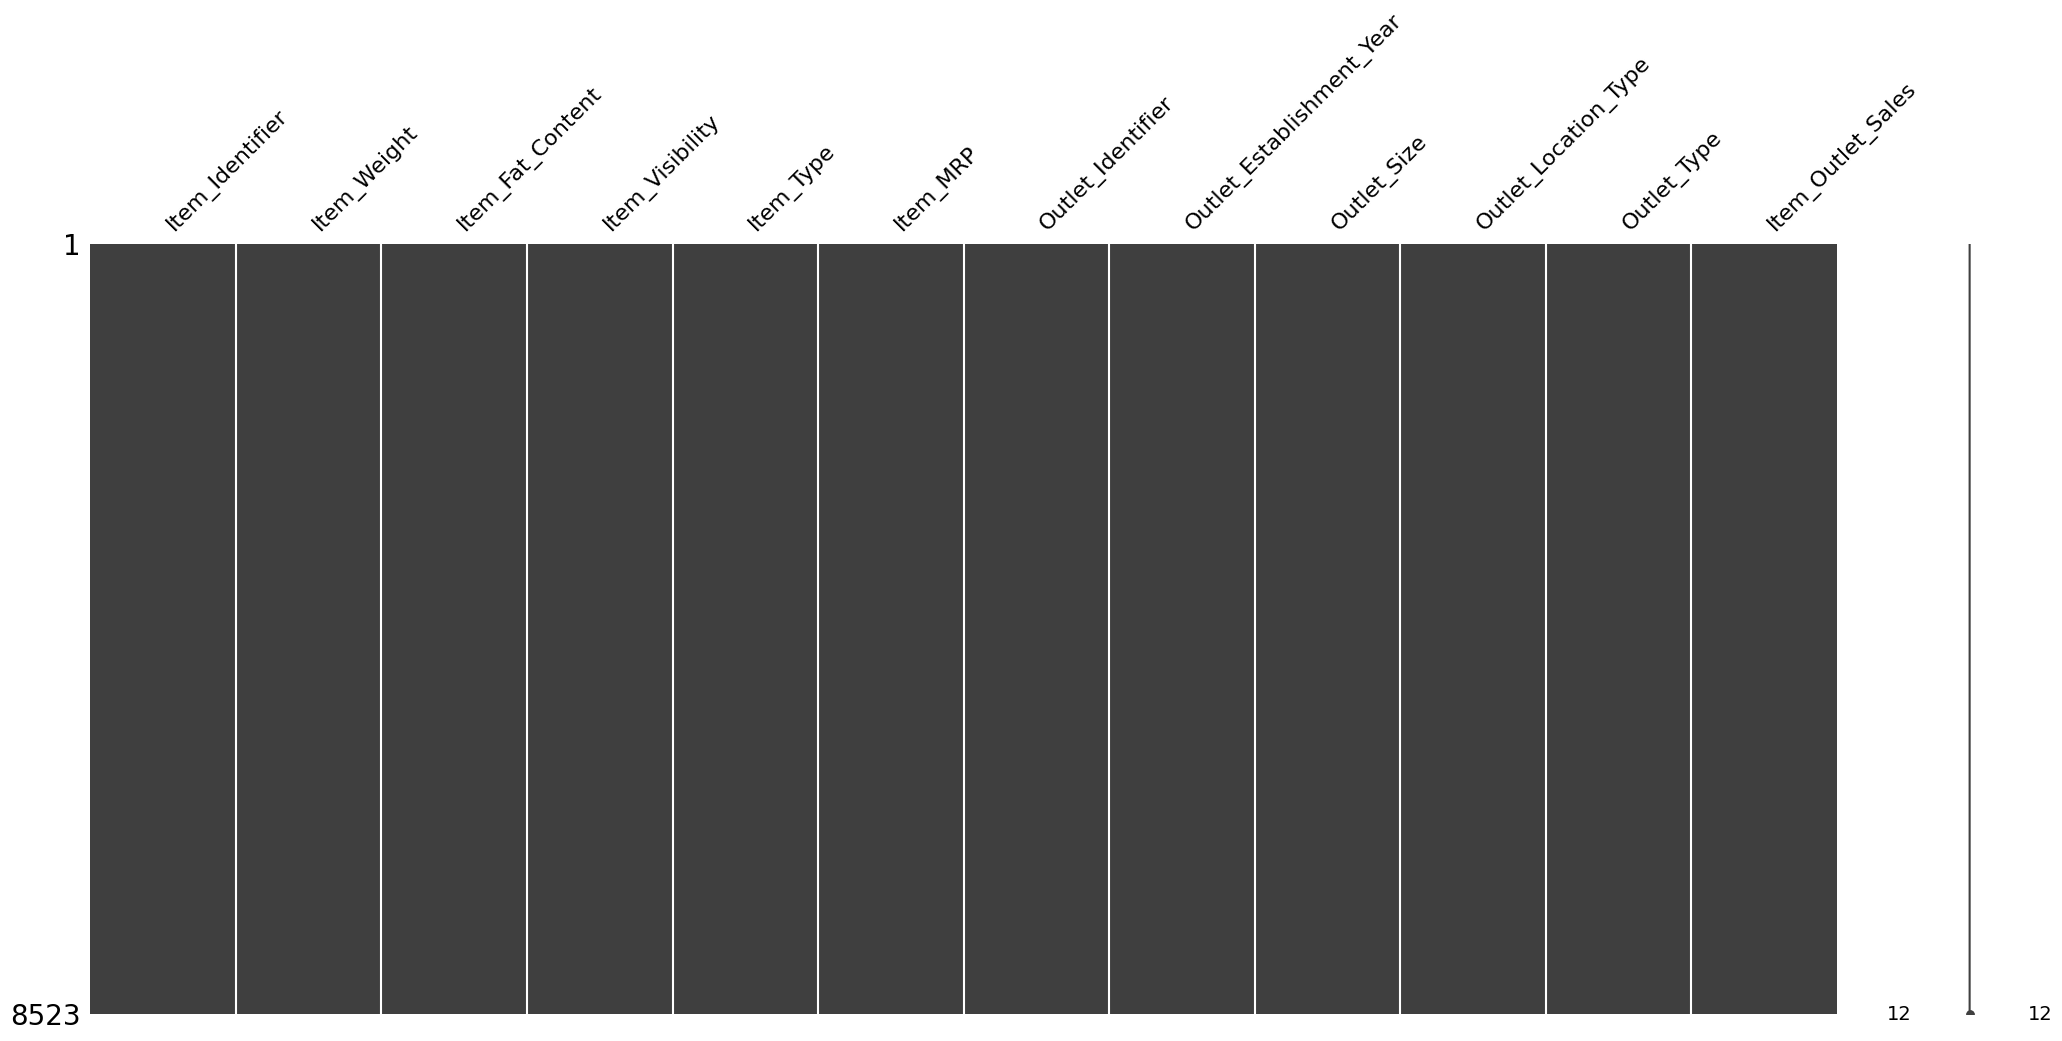

In [20]:
# Confirm no more nulls using using missingno
import missingno as msno
msno.matrix(df);

In [ ]:
#  list of object columns
string = df.select_dtypes("object").columns
string

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Check the nunique for just the object cols
string.nunique()

7

In [ ]:
#checking for inconsistent values
for k in string:
  print(f"Value Counts for {k}")
  print(df[k].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [33]:
#identify numerical columns
numerical = df.select_dtypes("number").columns
numerical


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

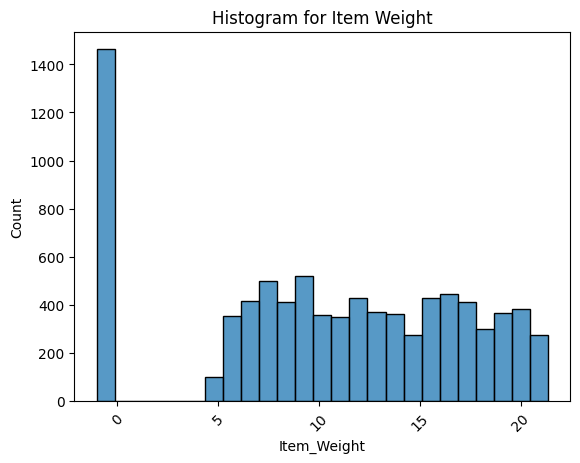

In [36]:
#Histograms for numerical features
import seaborn as sns
ax = sns.histplot(data=df, x="Item_Weight")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Histogram for Item Weight');

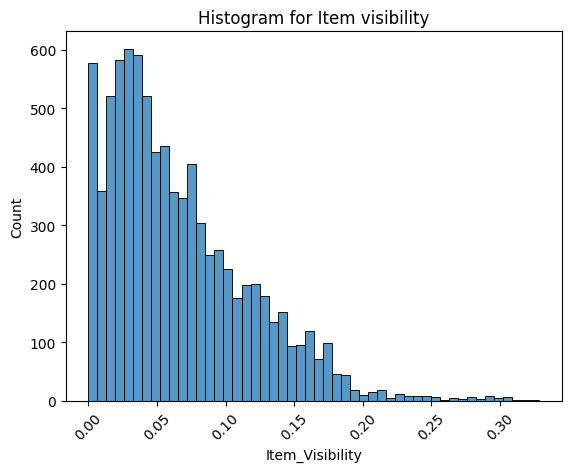

In [38]:
#Histogram for item visibility
ax = sns.histplot(data=df, x="Item_Visibility")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Histogram for Item visibility');

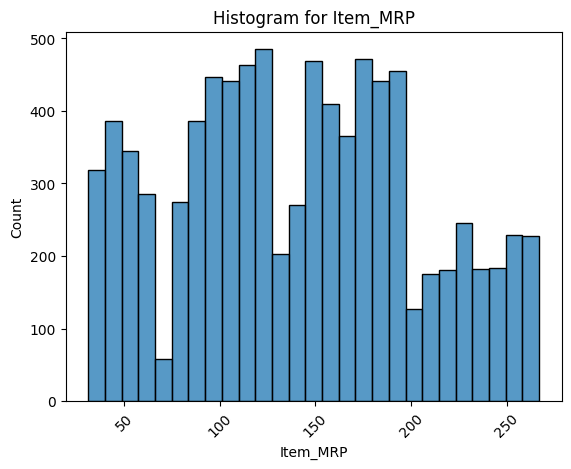

In [39]:
#Histogram for item MRP
ax = sns.histplot(data=df, x="Item_MRP")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Histogram for Item_MRP');

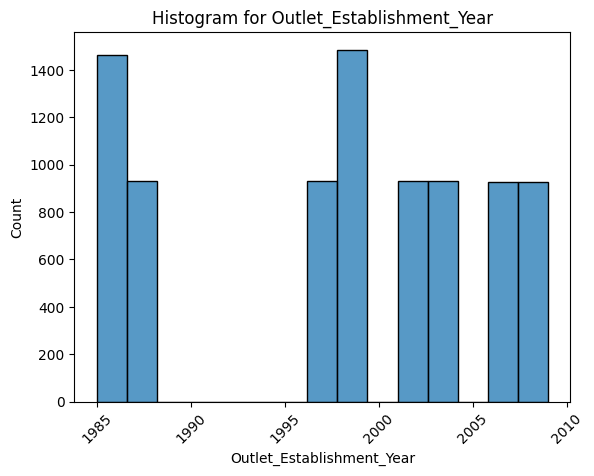

In [40]:
#Histogram for Oulet Establishment Year
ax = sns.histplot(data=df, x="Outlet_Establishment_Year")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Histogram for Outlet_Establishment_Year');

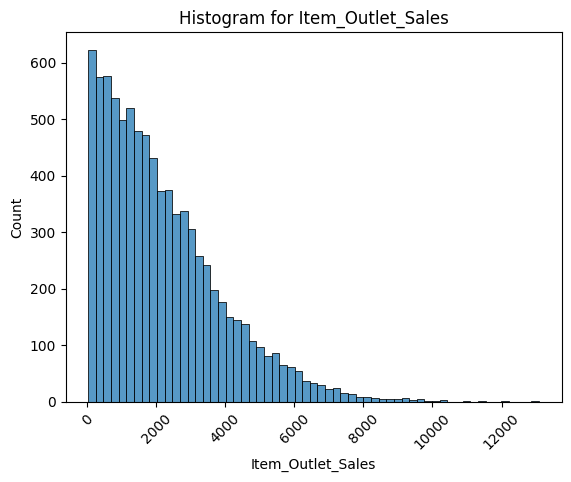

In [41]:
#Histogram for Item_Outlet_Sales
ax = sns.histplot(data=df, x="Item_Outlet_Sales")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Histogram for Item_Outlet_Sales');

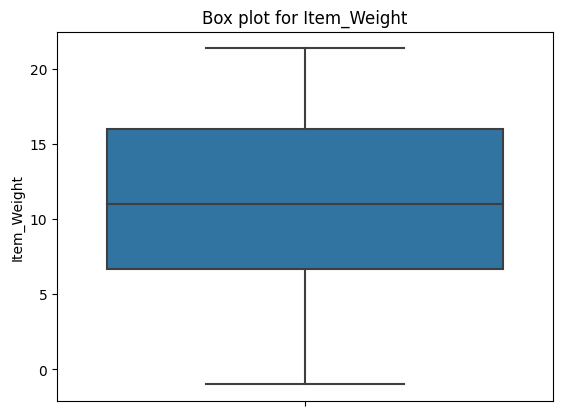

In [46]:
# boxplot for Item_Weight
ax = sns.boxplot(data=df, y="Item_Weight")
ax.set_title('Box plot for Item_Weight');

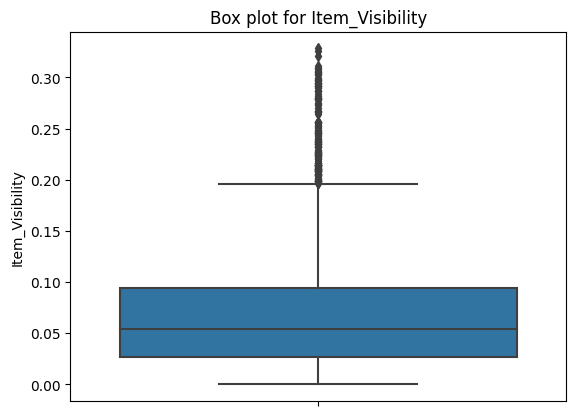

In [47]:
# boxplot for Item_Visibility
ax = sns.boxplot(data=df, y="Item_Visibility")
ax.set_title('Box plot for Item_Visibility');

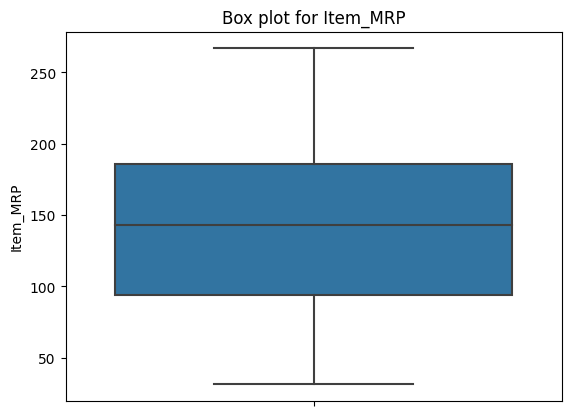

In [48]:
# boxplot for Item_MRP
ax = sns.boxplot(data=df, y="Item_MRP")
ax.set_title('Box plot for Item_MRP');

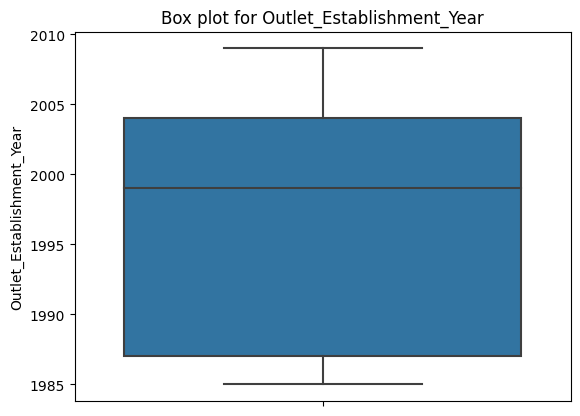

In [49]:
# boxplot for Outlet_Establishment_Year
ax = sns.boxplot(data=df, y="Outlet_Establishment_Year")
ax.set_title('Box plot for Outlet_Establishment_Year');

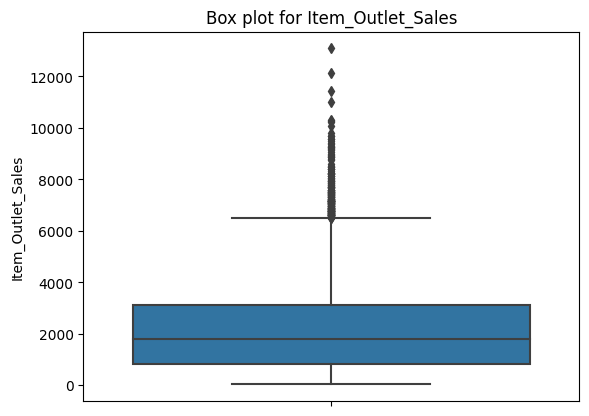

In [50]:
# boxplot for Item_Outlet_Sales
ax = sns.boxplot(data=df, y="Item_Outlet_Sales")
ax.set_title('Box plot for Item_Outlet_Sales');

In [51]:
cat_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

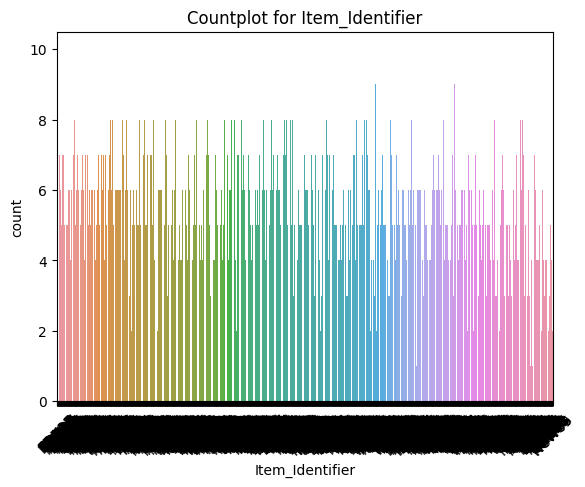

In [58]:
#  countplot for Item_Identifier
ax = sns.countplot(data=df, x='Item_Identifier' )
ax.set_title('Countplot for Item_Identifier');


Text(0.5, 1.0, 'Countplot for Item_Fat_Content')

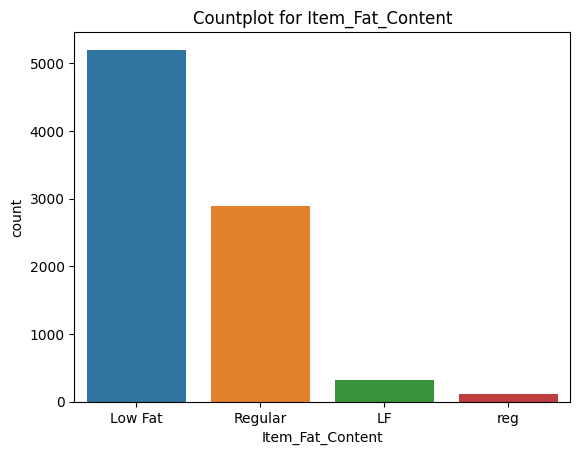

In [56]:
#  countplot for Item_Fat_Content
ax = sns.countplot(data=df, x='Item_Fat_Content' )
ax.set_title('Countplot for Item_Fat_Content')

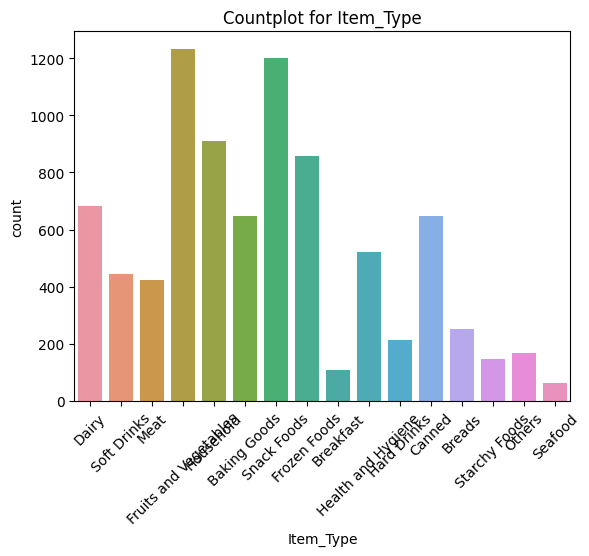

In [59]:
#  countplot for Item_Type
ax = sns.countplot(data=df, x='Item_Type' )
ax.set_title('Countplot for Item_Type')
ax.tick_params(axis='x', rotation = 45);

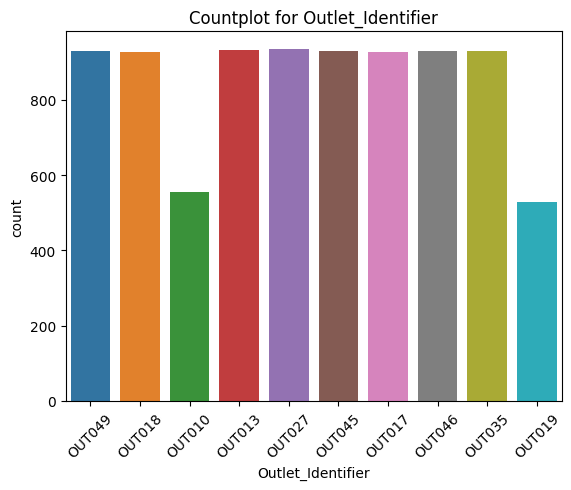

In [61]:
#  countplot for Outlet_Identifier
ax = sns.countplot(data=df, x='Outlet_Identifier' )
ax.set_title('Countplot for Outlet_Identifier')
ax.tick_params(axis='x', rotation = 45);

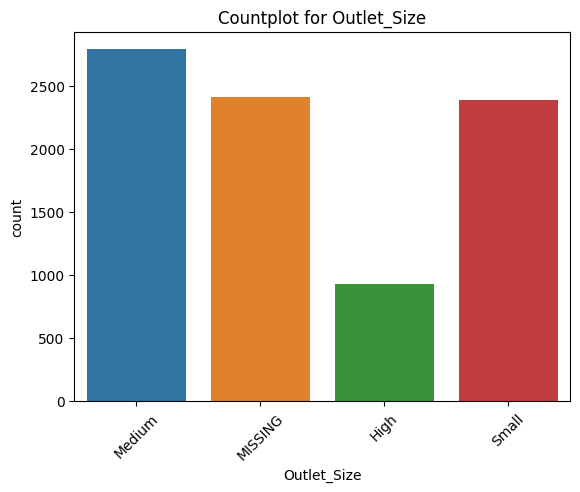

In [62]:
#  countplot for Outlet_Size
ax = sns.countplot(data=df, x='Outlet_Size' )
ax.set_title('Countplot for Outlet_Size')
ax.tick_params(axis='x', rotation = 45);

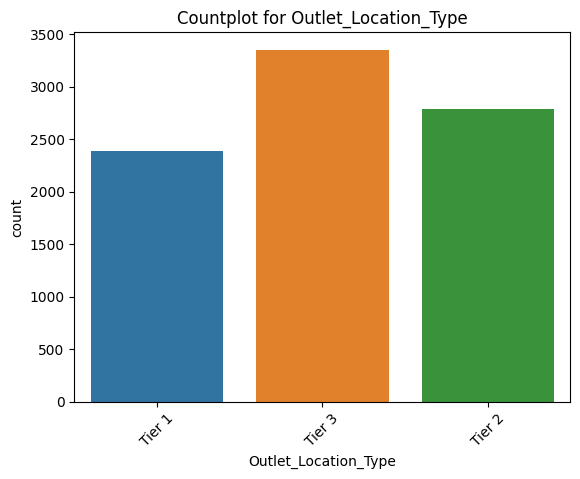

In [63]:
#  countplot for Outlet_Location_Type
ax = sns.countplot(data=df, x='Outlet_Location_Type' )
ax.set_title('Countplot for Outlet_Location_Type')
ax.tick_params(axis='x', rotation = 45);

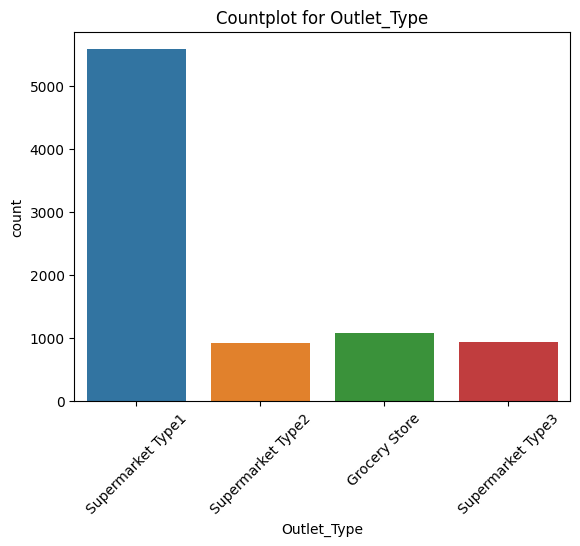

In [64]:
#  countplot for Outlet_Type
ax = sns.countplot(data=df, x='Outlet_Type' )
ax.set_title('Countplot for Outlet_Type')
ax.tick_params(axis='x', rotation = 45);

In [65]:
#Getting correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


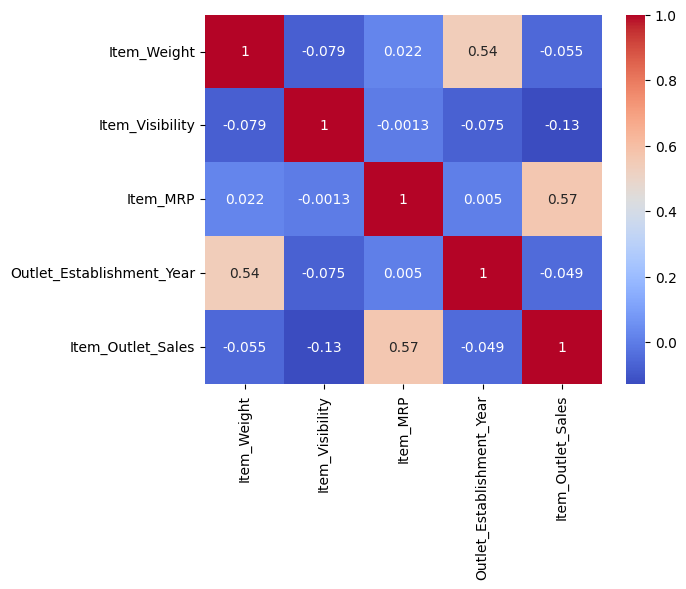

In [66]:
# Make heatmap of correlations
sns.heatmap(corr, cmap = 'coolwarm', annot = True);